In [237]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio 
import imutils 

In [238]:
trainImg = imageio.imread('C:/Users/Gautam/Desktop/Aero2Aastro/image.JPEG')
trainImg_gray = cv2.cvtColor(trainImg,cv2.COLOR_RGB2GRAY)

In [239]:
Img=imageio.imread('C:/Users/Gautam/Desktop/Aero2Aastro/image2.JPG')

In [240]:
Img = cv2.resize(Img, (800, 471)) 

In [241]:
Img_gray=cv2.cvtColor(Img,cv2.COLOR_RGB2GRAY)

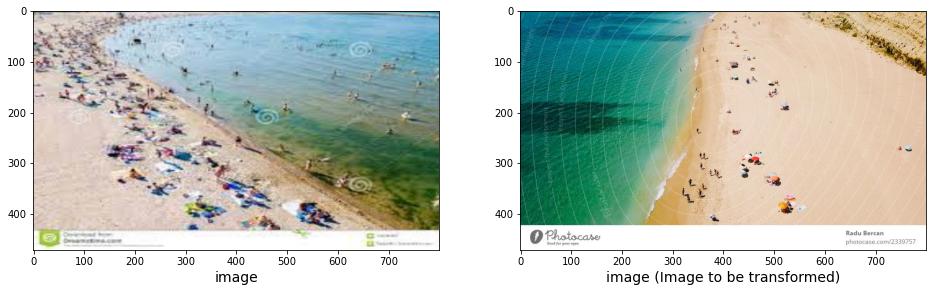

In [242]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,constrained_layout=False,figsize=(16,9))
ax1.imshow(Img,cmap="gray")
ax1.set_xlabel("image",fontsize=14)
ax2.imshow(trainImg,cmap="gray")
ax2.set_xlabel("image (Image to be transformed)",fontsize=14)
plt.show()

In [243]:
def detectAndDescribe(image,method=None):
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    if method=='sift':
        descriptor=cv2.xfeatures2d.SIFT_create()
    elif method=='surf':
        descriptor=cv2.xfeatures2d.SURF_create(400)
    elif method=='brisk':
        descriptor=cv2.BRISK_create()
    elif method=='orb':
        descriptor=cv2.ORB_create()
    (kps,features)=descriptor.detectAndCompute(image,None)
    
    return(kps,features)

## SIRF and SURF

In [244]:
kpsA,featuresA = detectAndDescribe(trainImg_gray,method=feature_extractor)
kpsB,featuresB = detectAndDescribe(Img_gray,method=feature_extractor)

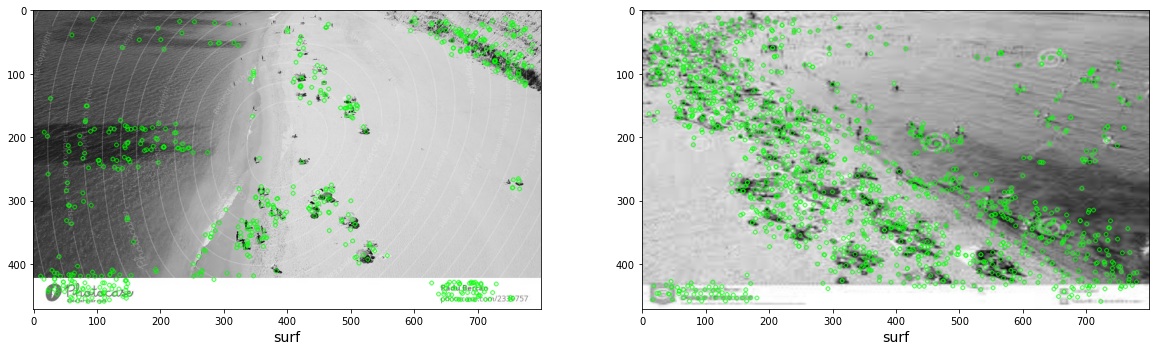

In [245]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8),constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel(feature_extractor,fontsize=14)
ax2.imshow(cv2.drawKeypoints(Img_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel(feature_extractor,fontsize=14)
plt.show()

In [278]:
def createMatcher(method,crossCheck):
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [279]:
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
    best_matches = bf.match(featuresA,featuresB)
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    return rawMatches

In [280]:
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    matches = []
    for m,n in rawMatches:
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

# Feature Matching

## Using BF

In [281]:
feature_extractor = 'surf'

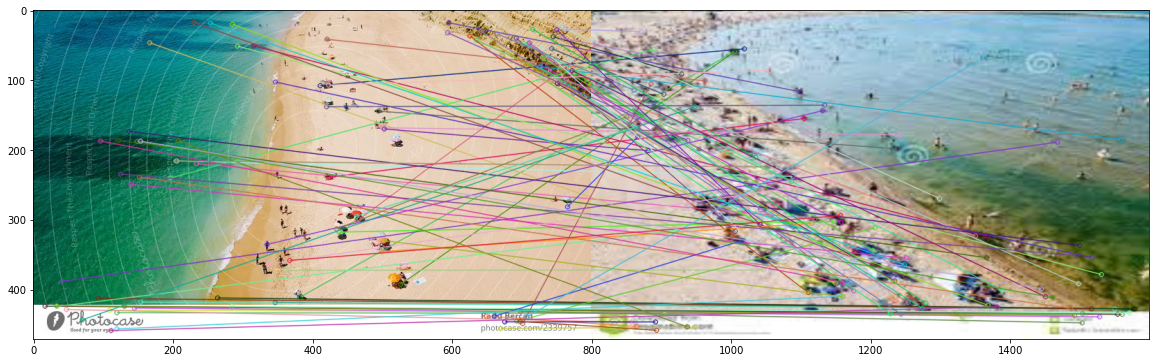

In [282]:
fig = plt.figure(figsize=(20,8))
matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
img3 = cv2.drawMatches(trainImg,kpsA,Img,kpsB,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

### Using KNN

In [283]:
feature_extractor = 'surf'

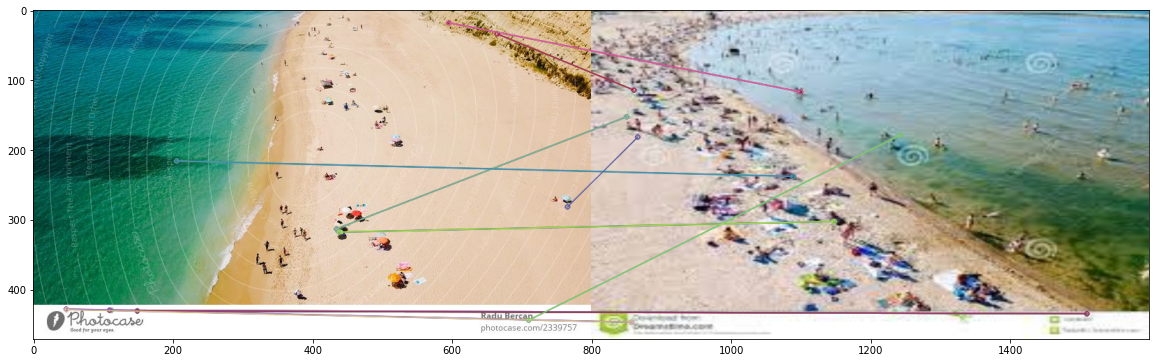

In [284]:
fig = plt.figure(figsize=(20,8))
matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
img3 = cv2.drawMatches(trainImg,kpsA,Img,kpsB,np.random.choice(matches,100),None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()